<a href="https://colab.research.google.com/github/DanielNoble/Aerospace/blob/main/Polygon_Partitioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from shapely.geometry import Polygon, LineString, Point
from shapely import affinity
import matplotlib.pyplot as plt
import math
import numpy as np

# Working Code

In [ ]:
def angle_between(p1, p2):
    ang1 = np.arctan2(*p1[::-1])
    ang2 = np.arctan2(*p2[::-1])
    return (ang2 - ang1) % (2 * np.pi)

In [ ]:
def scale_fit(line, polygon, scalar):
    start = line.coords[0]
    end = line.coords[1]
    deltax = end[0] - start[0]
    deltay = end[1] - start[1]
    deltax = deltax * scalar
    deltay = deltay * scalar
    new_coords = Point(deltax + start[0], deltay + start[1])
    new_line = LineString([start, new_coords])
    print(new_line)
    return new_line.intersection(polygon)

In [ ]:
# print(line_to_vec_working(LineString([[0, 0], [1, 0]])))
# print(scale_fit_working(LineString([[0.5, 0.5], [1, 0.5]]), polygon_w, 10))
print(scale_fit(LineString([(0.5, 0.5), (0.8623577544766736, 1.4320390859672263)]), cut_polygon_w, 0.7071067811865476))

LINESTRING (0.5 0.5, 0.756225625405986 1.159051158018337)
POINT (0.5 0.5)


In [ ]:
def line_to_vec(line):
    print(line.coords)
    return np.array([line.coords[1][0] - line.coords[0][0], line.coords[1][1] - line.coords[0][1]])

In [ ]:
def polygon_partition(shape, origin, n, step, threshold):
    target_area = shape.area / n
    print("Target area: "  + str(target_area))
    scalar = shape.hausdorff_distance(origin)

    starting_line = LineString([origin, Point(origin.x + 1, origin.y)])
    starting_line = scale_fit(starting_line, shape, scalar)
    vector_line = line_to_vec(starting_line)

    area = 1000
    angle = 0

    while (abs(area - target_area) > threshold):
        angle += step
        print(angle)

        new_line = LineString([origin, Point(origin.x + math.cos(angle), origin.y + math.sin(angle))])
        new_line = scale_fit(new_line, shape, scalar)

        points = []
        # Creates a list of the points on the shape that are in the angle
        for point in shape.exterior.coords:
            point_vec = line_to_vec(LineString([origin, point]))
            point_angle = angle_between(vector_line, point_vec)
            if (point_angle <= angle and point_angle >= 0):
                # print("Point: " + str(point) + ", Angle: " + str(point_angle))
                points.append(point)

        #Adds the end of the starting line, the end of the new line, and the origin to round out the polygon
        points.insert(0, starting_line.coords[1])
        points.insert(0, origin)
        points.append(new_line.coords[1])
        points.append(origin)
        sector = Polygon(points)

        # print("Sector area: " + str(sector.area))
        area = sector.area

    
    # TOOO: Iterate through, incrementing angle, finding new line intersecting polygon
    # Sector needs to include union of the lines and the polygon
    print("succeeded: " + str(sector.area))
    return sector

Target area: 0.2
LINESTRING (0.5 0.5, 1.207106781186547 0.5)
0.1
LINESTRING (0.5 0.5, 1.203574192576952 0.5705928858999942)
0.2
LINESTRING (0.5 0.5, 1.193011723205835 0.6404804310189812)
0.30000000000000004
LINESTRING (0.5 0.5, 1.175524909775664 0.7089643421078832)
0.4
LINESTRING (0.5 0.5, 1.151288474745862 0.7753603505648711)
0.5
LINESTRING (0.5 0.5, 1.120544580563746 0.8390050494210448)
0.6
LINESTRING (0.5 0.5, 1.083600410057402 0.8992625218835741)
0.7
LINESTRING (0.5 0.5, 1.040825097166413 0.9555306952060858)
0.7999999999999999
LINESTRING (0.5 0.5, 0.9926460386775458 1.007247356400526)
0.8999999999999999
LINESTRING (0.5 0.5, 0.9395446238173415 1.053895769683495)
0.9999999999999999
LINESTRING (0.5 0.5, 0.8820514243700899 1.095009839529386)
1.0999999999999999
LINESTRING (0.5 0.5, 0.8207408933799425 1.130178767742802)
1.2
LINESTRING (0.5 0.5, 0.756225625405986 1.159051158018337)
succeeded: 0.20140255382897437


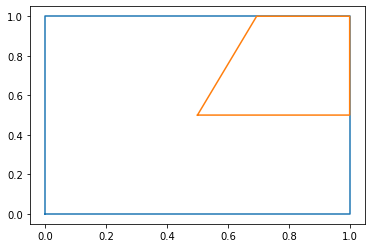

In [ ]:
polygon = Polygon([[0, 0], [1, 0], [1, 1], [0, 1], [0, 0]])
point = Point([0.5, 0.5])

sector = polygon_partition(polygon, point, 5, .1, .005)

plt.plot(*polygon.exterior.coords.xy)
plt.plot(*sector.exterior.coords.xy)

0.7985974461710257


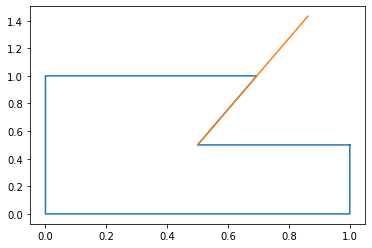

In [ ]:
cut_polygon = polygon.difference(sector)
plt.plot(*cut_polygon.exterior.coords.xy)
print(cut_polygon.area)
plt.plot(*LineString([(0.5, 0.5), (0.8623577544766736, 1.4320390859672263)]).coords.xy)

In [74]:
def polygon_partition(shape, origin, init_angle, n, step, threshold):
    target_area = shape.area / n
    # print("Target area: "  + str(target_area))
    scalar = shape.hausdorff_distance(origin)
    # print("Scalar: " + str(scalar))
    starting_line = LineString([origin, Point(origin.x + math.cos(init_angle + .01), origin.y + math.sin(init_angle + .01))])
    # print(list(starting_line.coords))
    starting_line = scale_fit(starting_line, shape, scalar)
    
    vector_line = line_to_vec(starting_line)
    # print("Vector_line" + str(vector_line))
    area = 0
    angle = init_angle

    while (abs(area - target_area) > threshold) and (area < target_area):
        angle += step
        # print(angle)

        new_line = LineString([origin, Point(origin.x + math.cos(angle), origin.y + math.sin(angle))])
        # print(new_line)
        new_line = scale_fit(new_line, shape, scalar)
        # print(new_line)

        points = []
        # Creates a list of the points on the shape that are in the angle
        for point in shape.exterior.coords:
            point_vec = line_to_vec(LineString([origin, point]))
            point_angle = angle_between(vector_line, point_vec)
            if (point_angle <= (angle - init_angle) and point_angle >= 0):
                # print("Point: " + str(point) + ", Angle: " + str(point_angle))
                points.append(point)
        
        #Adds the end of the starting line, the end of the new line, and the origin to round out the polygon
        points.insert(0, starting_line.coords[1])
        points.insert(0, origin)
        points.append(new_line.coords[1])
        points.append(origin)
        sector = Polygon(points)

        # print("Sector area: " + str(sector.area))
        area = sector.area

    

    print("succeeded: " + str(sector.area))
    return (angle, sector)

LINESTRING (0.5 0.5, 1.207071426142115 0.5070709499613245)
LINESTRING (0.5 0.5, 1.203574192576952 0.5705928858999942)
LINESTRING (0.5 0.5, 1.193011723205835 0.6404804310189812)
LINESTRING (0.5 0.5, 1.175524909775664 0.7089643421078832)
LINESTRING (0.5 0.5, 1.151288474745862 0.7753603505648711)
LINESTRING (0.5 0.5, 1.120544580563746 0.8390050494210448)
LINESTRING (0.5 0.5, 1.083600410057402 0.8992625218835741)
LINESTRING (0.5 0.5, 1.040825097166413 0.9555306952060858)
LINESTRING (0.5 0.5, 0.9926460386775458 1.007247356400526)
LINESTRING (0.5 0.5, 0.9395446238173415 1.053895769683495)
LINESTRING (0.5 0.5, 0.8820514243700899 1.095009839529386)
LINESTRING (0.5 0.5, 0.8207408933799425 1.130178767742802)
LINESTRING (0.5 0.5, 0.756225625405986 1.159051158018337)
succeeded: 0.20015251216064098
LINESTRING (0.5 0.5, 0.7496224124926031 1.161580419285043)
LINESTRING (0.5 0.5, 0.689150235679904 1.181338526976302)
LINESTRING (0.5 0.5, 0.6201849193236633 1.196818186593293)
LINESTRING (0.5 0.5, 0.5500

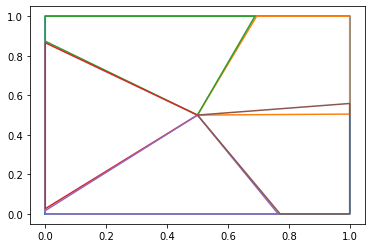

In [75]:
angles = []
sectors = []
new_angle = 0
plt.plot(*polygon.exterior.coords.xy)
n = 5
for i in range(n):
    new_angle, new_sector = polygon_partition(polygon, point, new_angle, n, .1, .01)
    plt.plot(*new_sector.exterior.coords.xy)
    angles.append(new_angle)
    sectors.append(new_sector)

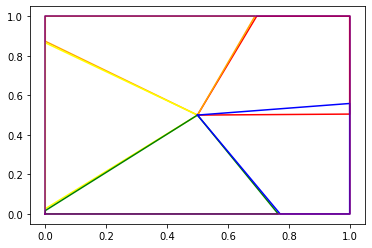

In [76]:
plt.plot(*sectors[0].exterior.coords.xy,color='red')
plt.plot(*sectors[1].exterior.coords.xy,color='orange')
plt.plot(*sectors[2].exterior.coords.xy,color='yellow')
plt.plot(*sectors[3].exterior.coords.xy,color='green')
plt.plot(*sectors[4].exterior.coords.xy,color='blue')
plt.plot(*polygon.exterior.coords.xy,color='purple')

In [79]:
def partitioner(shape, origin, n):
    angles = []
    sectors = []
    new_angle = 0
    # plt.plot(*polygon.exterior.coords.xy)
    n = 5
    for i in range(n):
        new_angle, new_sector = polygon_partition(polygon, point, new_angle, n, .05, .01)
        # plt.plot(*new_sector.exterior.coords.xy)
        angles.append(new_angle)
        sectors.append(new_sector)

    return sectors

LINESTRING (0.5 0.5, 1.207071426142115 0.5070709499613245)
LINESTRING (0.5 0.5, 1.206223081837111 0.535340609509367)
LINESTRING (0.5 0.5, 1.203574192576952 0.5705928858999942)
LINESTRING (0.5 0.5, 1.199166734249708 0.6056687168399357)
LINESTRING (0.5 0.5, 1.193011723205835 0.6404804310189812)
LINESTRING (0.5 0.5, 1.185124543767477 0.6749410172812735)
LINESTRING (0.5 0.5, 1.175524909775664 0.7089643421078832)
LINESTRING (0.5 0.5, 1.164236815315985 0.7424653649057488)
LINESTRING (0.5 0.5, 1.151288474745862 0.775360350564871)
LINESTRING (0.5 0.5, 1.136712252173355 0.8075670787524794)
LINESTRING (0.5 0.5, 1.120544580563746 0.8390050494210448)
LINESTRING (0.5 0.5, 1.102825870676097 0.8695956840164745)
LINESTRING (0.5 0.5, 1.083600410057402 0.8992625218835741)
LINESTRING (0.5 0.5, 1.062916252346783 0.9279314113778669)
LINESTRING (0.5 0.5, 1.040825097166413 0.9555306952060858)
LINESTRING (0.5 0.5, 1.017382160899393 0.9819913895320894)
LINESTRING (0.5 0.5, 0.9926460386775455 1.007247356400526)

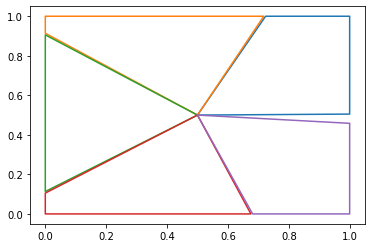

In [80]:
sectors = partitioner(polygon, point, 5)
for sector in sectors:
    plt.plot(*sector.exterior.coords.xy)

# Full Partitioning

In [ ]:
second_angle, second_sector = polygon_partition(polygon_w.difference(sector_w), point_w, first_angle, 4, .1, .005)

In [ ]:
sectors = []
angle = 0
scalar = polygon_w.hausdorff_distance(point_w)
starting_line = LineString([point_w, Point(point_w.x + 1, point_w.y)])
starting_line = scale_fit_working(starting_line, polygon_w, scalar)
vector_line = line_to_vec_working(starting_line)
starting_polygon = polygon_w

# for i in range(5):
#     angle, prev_sector = polygon_partition(starting_polygon, point_w, angle, 5 - i, .1, .005)
#     sectors.append(prev_sector)

#     points = []
#     points.append(point_w)
#     points.append(starting_line.coords[1])
#     for point in starting_polygon.exterior.coords:
#         point_vec = line_to_vec_working(LineString([point_w, point]))
#         point_angle = angle_between_working(vector_line, point_vec)
#         if (point_angle <= angle):
#             points.append(point)

#     sector_total = Polygon(points)
#     print(list(sector_total.exterior.coords))
#     # starting_polygon = starting_polygon.difference(sector_total)
#     plt.plot(*starting_polygon.exterior.coords.xy)

angle, prev_sector = polygon_partition(starting_polygon, point_w, angle, 5 - i, .1, .005)
sectors.append(prev_sector)

points = []
points.append(point_w)
points.append(starting_line.coords[1])
for point in starting_polygon.exterior.coords:
    point_vec = line_to_vec_working(LineString([point_w, point]))
    point_angle = angle_between_working(vector_line, point_vec)
    if (point_angle <= angle):
        points.append(point)

sector_total = Polygon(points)
print(list(sector_total.exterior.coords))
starting_polygon = starting_polygon.difference(sector_total)
# plt.plot(*starting_polygon.exterior.coords.xy)
    

# for sector in sectors:
#     plt.plot(*sector.exterior.coords.xy)

LINESTRING (0.5 0.5, 1.207106781186547 0.5)
Target area: 0.5
Scalar: 0.7071067811865476
[(0.5, 0.5), (1.4999500004166653, 0.5099998333341667)]
LINESTRING (0.5 0.5, 1.207071426142115 0.5070709499613245)
Vector_line[0.5        0.00500017]
0.1
LINESTRING (0.5 0.5, 1.495004165278026 0.5998334166468282)
LINESTRING (0.5 0.5, 1.203574192576952 0.5705928858999942)
LINESTRING (0.5 0.5, 1 0.5501673360427254)
0.2
LINESTRING (0.5 0.5, 1.480066577841242 0.6986693307950612)
LINESTRING (0.5 0.5, 1.193011723205835 0.6404804310189812)
LINESTRING (0.5 0.5, 1 0.6013550177543362)
0.30000000000000004
LINESTRING (0.5 0.5, 1.455336489125606 0.7955202066613396)
LINESTRING (0.5 0.5, 1.175524909775664 0.7089643421078832)
LINESTRING (0.5 0.5, 1 0.6546681248048116)
0.4
LINESTRING (0.5 0.5, 1.421060994002885 0.8894183423086506)
LINESTRING (0.5 0.5, 1.151288474745862 0.7753603505648711)
LINESTRING (0.5 0.5, 1 0.7113966093690809)
0.5
LINESTRING (0.5 0.5, 1.377582561890373 0.979425538604203)
LINESTRING (0.5 0.5, 1.12

TopologyException: Input geom 1 is invalid: Self-intersection at or near point 0 0 at 0 0


2.9000000000000012
LINESTRING (0.5 0.5, -0.4709581651495908 0.7392493292139811)
LINESTRING (0.5 0.5, -0.1865711028257234 0.6691748230815389)
LINESTRING (0.5 0.5, 0 0.6232026969859825)
3.0000000000000013
LINESTRING (0.5 0.5, -0.4899924966004456 0.6411200080598659)
LINESTRING (0.5 0.5, -0.2000304076699753 0.5997869146602315)
LINESTRING (0.5 0.5, 0 0.5712732715371382)
3.1000000000000014
LINESTRING (0.5 0.5, -0.4991351502732795 0.5415806624332892)
LINESTRING (0.5 0.5, -0.2064952400800761 0.5294019683728075)
LINESTRING (0.5 0.5, 0 0.5208083272928173)
3.2000000000000015
LINESTRING (0.5 0.5, -0.498294775794753 0.4416258565724186)
LINESTRING (0.5 0.5, -0.205901005587574 0.4587232473364011)
LINESTRING (0.5 0.5, 0 0.47076307277021)
3.3000000000000016
LINESTRING (0.5 0.5, -0.4874797699088647 0.34225430585675)
LINESTRING (0.5 0.5, -0.1982536415870899 0.3884569499683289)
LINESTRING (0.5 0.5, 0 0.420127126169983)
3.4000000000000017
LINESTRING (0.5 0.5, -0.4667981925794605 0.2444588979731671)
LINESTR

TopologicalError: ignored

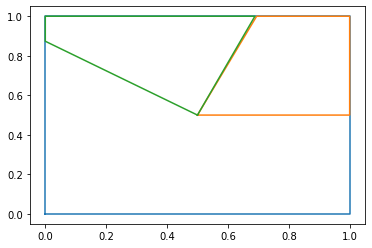

In [ ]:
plt.plot(*polygon_w.exterior.coords.xy)
plt.plot(*sector_w.exterior.coords.xy)
plt.plot(*second_sector.exterior.coords.xy)